In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=20, h2=20, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    # input layer
        self.fc2 = nn.Linear(h1, h2)            # hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [26]:
torch.manual_seed(32)
model = Model()

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


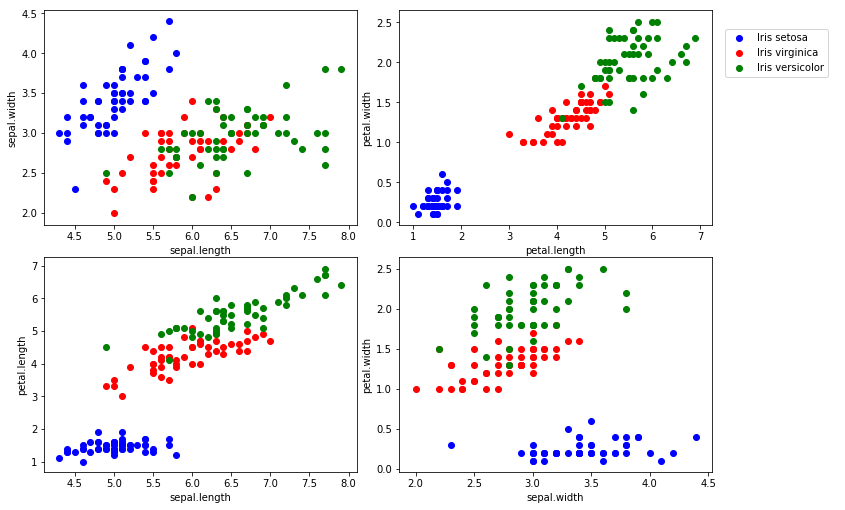

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['variety']==j][x], df[df['variety']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [8]:
X = df.drop('variety',axis=1).values
y = df['variety'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# y_train = F.one_hot(torch.LongTensor(y_train))  # not needed with Cross Entropy Loss
# y_test = F.one_hot(torch.LongTensor(y_test))
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [27]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [28]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=3, bias=True)
)>

In [29]:
epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 1.08135462
epoch: 11  loss: 0.53748733
epoch: 21  loss: 0.29728812
epoch: 31  loss: 0.16205813
epoch: 41  loss: 0.11517807
epoch: 51  loss: 0.10770357
epoch: 61  loss: 0.10658477
epoch: 71  loss: 0.10503846
epoch: 81  loss: 0.10365715
epoch: 91  loss: 0.10274009


Text(0.5, 0, 'EPOCHS')

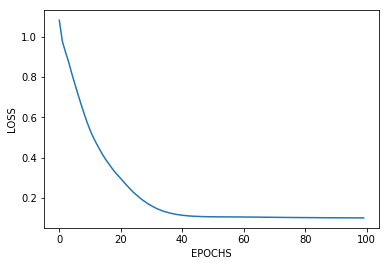

In [30]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel('EPOCHS')

In [32]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)

In [33]:
loss

tensor(0.0605)

In [38]:
correct = 0

with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1}.) likelihood: {str(y_val)}, predicted class: {str(y_val.argmax().item())}, true class: {y_test[i]}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
            
            
print(f'the model predicted {correct} correct values')

1.) likelihood: tensor([-2.6048,  5.5826,  1.2221]), predicted class: 1, true class: 1
2.) likelihood: tensor([-2.2311,  6.6030,  0.5068]), predicted class: 1, true class: 1
3.) likelihood: tensor([ 11.8947,   4.5562, -13.6061]), predicted class: 0, true class: 0
4.) likelihood: tensor([-4.1325,  5.8062,  2.7300]), predicted class: 1, true class: 1
5.) likelihood: tensor([-7.9937,  4.4715,  7.2037]), predicted class: 2, true class: 2
6.) likelihood: tensor([-10.7166,   3.2197,  10.6576]), predicted class: 2, true class: 2
7.) likelihood: tensor([ 11.3314,   4.7692, -13.0851]), predicted class: 0, true class: 0
8.) likelihood: tensor([ 13.4603,   4.6419, -15.2837]), predicted class: 0, true class: 0
9.) likelihood: tensor([-7.9371,  4.5551,  7.0846]), predicted class: 2, true class: 2
10.) likelihood: tensor([-9.6584,  4.1603,  9.0727]), predicted class: 2, true class: 2
11.) likelihood: tensor([-10.3406,   3.8325,   9.9608]), predicted class: 2, true class: 2
12.) likelihood: tensor([ 

In [39]:
torch.save(model.state_dict(), 'simple_ann_model_trained_on_iris_dataset.pt') #saving model weights

In [40]:
new_model = Model() # a new model without any weights or biases
new_model.load_state_dict(torch.load('simple_ann_model_trained_on_iris_dataset.pt'))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [41]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=3, bias=True)
)

In [42]:
new_model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=3, bias=True)
)>

In [43]:
unknown_flower = torch.tensor([5.6,3.7,2.2,0.5])

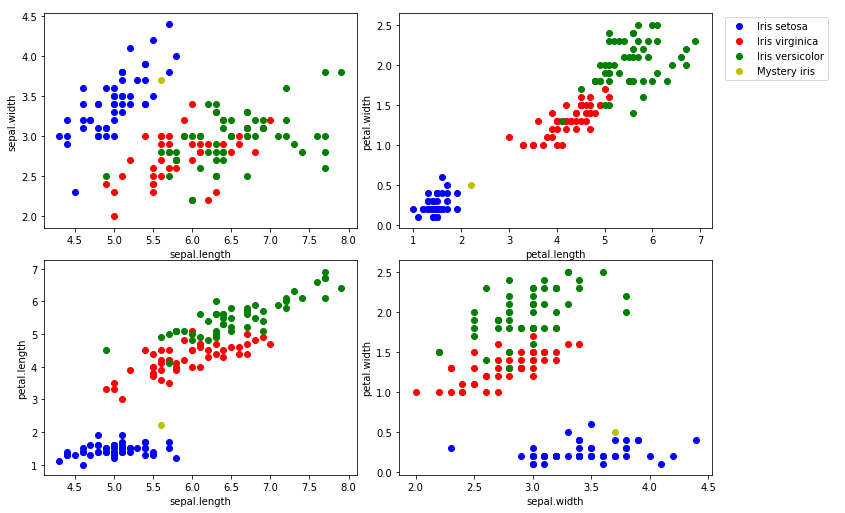

In [47]:
#ploting the unknown_flower 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ['b', 'r', 'g']
labels = ['Iris setosa','Iris virginica','Iris versicolor','Mystery iris']

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df.columns[plots[i][0]]
        y = df.columns[plots[i][1]]
        ax.scatter(df[df['variety']==j][x], df[df['variety']==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)
        
    # Add a plot for our mystery iris:
    ax.scatter(unknown_flower[plots[i][0]],unknown_flower[plots[i][1]], color='y')
    
fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [51]:
with torch.no_grad():
    print(new_model(unknown_flower))
    print(new_model(unknown_flower).argmax())

tensor([ 10.6266,   5.4875, -12.5786])
tensor(0)
